In [11]:
!pip install tensorflow-gpu==1.14.0 keras==2.2.4 numpy scikit-learn

60000 train samples
10000 test samples


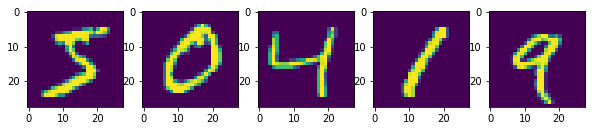

In [14]:
import numpy as np
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt

NB_EPOCH = 10
BATCH_SIZE = 128
NB_CLASSES = 10
VALIDATION_SPLIT = 0.2
IMG_ROWS, IMG_COLS = 28, 28
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)
OPTIMIZER = Adam()

K.set_image_dim_ordering("th")

(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.figure(figsize=(10,10))
cols = 5

for i in range(cols):
  plt.subplot(5 / cols + 1, cols, i + 1)
  plt.imshow(X_train[i])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

model = Sequential([
  Conv2D(20, kernel_size=5, padding="same", input_shape=INPUT_SHAPE),
  Activation("relu"),
  MaxPooling2D(pool_size=(2,2), strides=(2,2)),

  Conv2D(50, kernel_size=5, padding="same"),
  Activation("relu"),
  MaxPooling2D(pool_size=(2,2), strides=(2,2)),

  Flatten(),
  Dense(500),
  Activation("relu"),

  Dense(NB_CLASSES),
  Activation("softmax"),
])

model.compile(
  loss="categorical_crossentropy",
  optimizer=OPTIMIZER,
  metrics=["accuracy"]
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 65us/step - loss: 0.1799 - acc: 0.9456 - val_loss: 0.0651 - val_acc: 0.9817
Epoch 2/10
48000/48000 [==============================] - 3s 55us/step - loss: 0.0487 - acc: 0.9843 - val_loss: 0.0517 - val_acc: 0.9840
Epoch 3/10
48000/48000 [==============================] - 3s 55us/step - loss: 0.0317 - acc: 0.9898 - val_loss: 0.0372 - val_acc: 0.9896
Epoch 4/10
48000/48000 [==============================] - 3s 55us/step - loss: 0.0243 - acc: 0.9923 - val_loss: 0.0431 - val_acc: 0.9867
Epoch 5/10
48000/48000 [==============================] - 3s 55us/step - loss: 0.0168 - acc: 0.9951 - val_loss: 0.0389 - val_acc: 0.9874
Epoch 6/10
48000/48000 [==============================] - 3s 55us/step - loss: 0.0134 - acc: 0.9955 - val_loss: 0.0364 - val_acc: 0.9908
Epoch 7/10
48000/48000 [==============================] - 3s 54us/step - loss: 0.0105 - acc: 0.9965 - val_loss: 0.0352 - val_acc

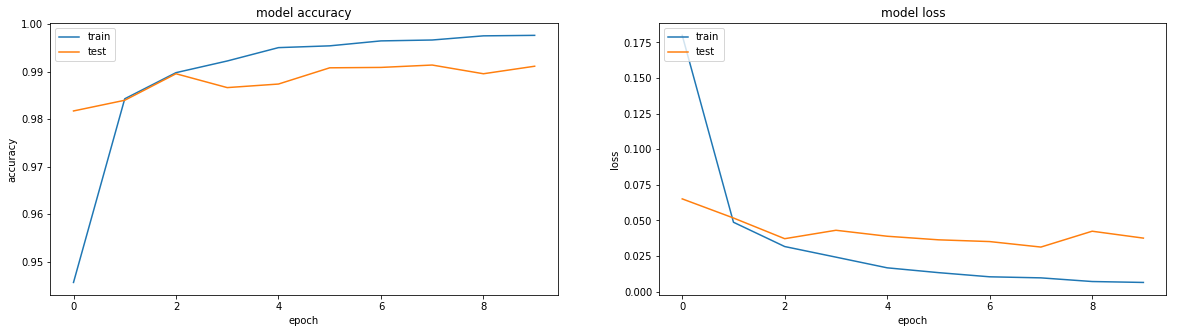

In [15]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, y_test)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()